<a href="https://colab.research.google.com/github/josefinavanotti/josefinavanotti/blob/main/TP_Python_Estad%C3%ADsitica_Actuarial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.1 Estadística Descriptiva y Manejo de Datos**

Importo las librerías que se van a utilizar:

In [28]:
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sn

from scipy import stats
from random import sample
from scipy.stats import norm
import warnings

warnings.simplefilter("ignore")

Importación y lectura del archivo:

In [29]:
from google.colab import files
uploaded = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches (5).csv


In [30]:
df = pd.read_csv('WorldCupMatches.csv') 

In [31]:
df = df.drop_duplicates()
df = df[df['Year'].notna()]
df.shape#836 filas
#df.tail()

(836, 20)

In [32]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           8

In [34]:
round(df.describe()) #Estadísticas

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,836.0,836.0,836.0,835.0,836.0,836.0,836.0,836.0
mean,1985.0,2.0,1.0,44859.0,1.0,0.0,10860927.0,56775774.0
std,22.0,2.0,1.0,23551.0,1.0,1.0,27518016.0,107032911.0
min,1930.0,0.0,0.0,2000.0,0.0,0.0,201.0,25.0
25%,1970.0,1.0,0.0,29800.0,0.0,0.0,262.0,1184.0
50%,1990.0,2.0,1.0,41000.0,0.0,0.0,337.0,2114.0
75%,2002.0,3.0,2.0,61009.0,1.0,1.0,249722.0,43950047.0
max,2014.0,10.0,7.0,173850.0,6.0,5.0,97410600.0,300186515.0


## ▶*Problem 1*
Obtenga la cantidad total de goles en los mundiales del año:

In [35]:
total_goals= df['Home Team Goals'] + df['Away Team Goals']
df = df.assign(total_goals=total_goals)
print(df. iloc[:,-1:])

     total_goals
0            5.0
1            3.0
2            3.0
3            4.0
4            1.0
..           ...
831          1.0
832          3.0
833          2.0
834          1.0
835          3.0

[836 rows x 1 columns]


In [36]:
goals_78=sum(df[df['Year'] == 1978]['total_goals'])
goals_78
print("la cantidad total de goles en el mundial del año 1978 fue:", goals_78 )

la cantidad total de goles en el mundial del año 1978 fue: 102.0


In [37]:
goals_86=sum(df[df['Year'] == 1986]['total_goals'])
goals_86
print("la cantidad total de goles en el mundial del año 1986 fue:", goals_86 )

la cantidad total de goles en el mundial del año 1986 fue: 132.0


In [38]:
goals_90=sum(df[df['Year'] == 1990]['total_goals'])
goals_90
print("la cantidad total de goles en el mundial del año 1990 fue:", goals_90 )

la cantidad total de goles en el mundial del año 1990 fue: 115.0


# ▶*Problem 2:*
 Obtenga la cantidad de goles anotados por Argentina entre 1998 y 2010, inclusive.
¿Cuántos fueron de ’local’ (home) y cuántos de ’visitante’ (away)?


In [39]:

year_range_query = (df['Year'] >= 1998) & (df['Year'] <= 2010)
wcp = df[year_range_query]
arg_local_goals = sum(wcp[wcp['Home Team Name'] == 'Argentina']['Home Team Goals'])
arg_away_goals = sum(wcp[wcp['Away Team Name'] == 'Argentina']['Away Team Goals'])
total_arg_goals = arg_local_goals + arg_away_goals

print('La cantidad de goles anotados por Argentina entre 1998 y 2010 fue de:',total_arg_goals, '. Los goles de local fueron',arg_local_goals , 'y los goles de visitante fueron' , arg_away_goals )


La cantidad de goles anotados por Argentina entre 1998 y 2010 fue de: 33.0 . Los goles de local fueron 28.0 y los goles de visitante fueron 5.0


# ▶ Problem 3
¿Cuál de los siguientes países jugó más mundiales: Brasil, Inglaterra o Francia? Indique
el total de veces que jugó cada uno.


In [40]:
#bra_matches = (df['Home Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Brazil') # (df['Away Team Name'] == 'Brazil')
#total_bra_matches=bra_matches.sum() #104
#eng_matches = (df['Home Team Name'] == 'England') | (df['Away Team Name'] == 'England') 
#total_eng_matches=eng_matches.sum() #62
#fra_matches = (df['Home Team Name'] == 'France') | (df['Away Team Name'] == 'France')
#total_fra_matches=fra_matches.sum() #59
#if total_fra_matches > total_eng_matches :
#  print('El país que jugó más mundiales fue Francia con',total_fra_matches,'- Brasil jugó',total_bra_matches,'- Inglaterra jugó',total_eng_matches)
#elif total_eng_matches > total_bra_matches :
 #   print('El país que jugó más mundiales fue Inglaterra con',total_eng_matches,'- Brasil jugó',total_bra_matches,'- Francia jugó',total_fra_matches)
#else :
#      print('El país que jugó más mundiales fue Brasil con',total_bra_matches,'- Francia jugó',total_fra_matches,'- Inglaterra jugó',total_eng_matches)

El país que jugó más mundiales fue Brasil con 104 - Francia jugó 59 - Inglaterra jugó 62


In [50]:
bra_matches = (df['Home Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Brazil') 
bra_years = set(df[bra_matches]['Year'])
bra_wcp = len(bra_years)
eng_matches = (df['Home Team Name'] == 'England') | (df['Away Team Name'] == 'England') 
eng_years = set(df[eng_matches]['Year'])
eng_wcp = len(eng_years)
fra_matches = (df['Home Team Name'] == 'France') | (df['Away Team Name'] == 'France') 
fra_years = set(df[fra_matches]['Year'])
fra_wcp = len(fra_years)

if fra_wcp > eng_wcp :
  print('El país que jugó más mundiales fue Francia con',fra_wcp,'- Brasil jugó',bra_wcp,'- Inglaterra jugó',eng_wcp)
elif eng_wcp > bra_wcp :
    print('El país que jugó más mundiales fue Inglaterra con',eng_wcp,'- Brasil jugó',bra_wcp,'- Francia jugó',fra_wcp)
else :
      print('El país que jugó más mundiales fue Brasil con',bra_wcp,'- Francia jugó',fra_wcp,'- Inglaterra jugó',eng_wcp)



El país que jugó más mundiales fue Brasil con 20 - Francia jugó 14 - Inglaterra jugó 14


# ▶ Problem 4
Calcule el promedio, la mediana y el desvío de los goles anotados por equipos ’locales’ (home) entre los años 2006 y 2014, inclusive. Grafique un histograma con la distribución de dicha variable.

In [41]:
year_range = (df['Year'] >= 2006) & (df['Year'] <= 2014) #192 partidos
htg = df[year_range]
mean_htg = round(np.mean(htg['Home Team Goals']),4)
print('El promedio de goles anotados por equipos "locales" fue de:',mean_htg)


#otra forma
#total_years = year_range.sum()
#home_team_goals = sum(htg['Home Team Goals'])  #243 goles de local
#mean_home_team_goals = home_team_goals/total_years
#print('El promedio de goles anotados por equipos "locales" fue de:',mean_home_team_goals)
#mean_home_team_goals = htg.mean(htg['Home Team Goals'])


El promedio de goles anotados por equipos "locales" fue de: 1.2656


In [42]:
home_team_goals = df[['Year','Home Team Goals']]
year_range2 = (home_team_goals['Year']>=2006 & (home_team_goals['Year']<=2014))
home_goals = home_team_goals[year_range2]

In [43]:
median_htg = np.median(htg['Home Team Goals'])
print('La mediana de goles anotados por equipos "locales" fue de:',median_htg)

La mediana de goles anotados por equipos "locales" fue de: 1.0


In [44]:
std_htg = round(np.std(htg['Home Team Goals']),4)
print('El desvío de goles anotados por equipos "locales" fue de:',std_htg)

El desvío de goles anotados por equipos "locales" fue de: 1.2107


(array([[1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.]]),
 array([   0. ,  201.4,  402.8,  604.2,  805.6, 1007. , 1208.4, 1409.8,
        1611.2, 1812.6, 2014. ]),
 <a list of 836 Lists of Patches objects>)

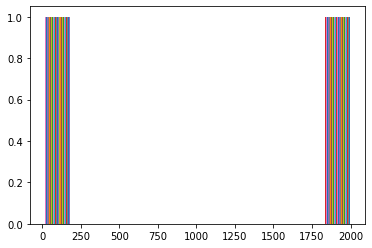

In [45]:
plt.hist(home_team_goals)

#*Problem 5*

Obtenga la media y la varianza de la asistencia de cada partido (attendance) entre los
años 1930 y 1960. Realice lo mismo para el período 1980 a 2010. Compare ambas
distribuciones mediante un gráfico donde se vean dichas distribuciones sobre el mismo
eje.


In [52]:
year_range_query2 = (df['Year'] >= 1930) & (df['Year'] <= 1960)
atte=df[year_range_query2]
attendance = sum(atte['Attendance'])
attendance_mean1 = attendance/len(atte['Attendance'])
print('La media de la asistencia de cada partido entre 1930 y 1960 es:' , attendance_mean1)

La media de la asistencia de cada partido entre 1930 y 1960 es: 29139.058823529413


In [53]:
attendance_var1 = statistics.variance(atte['Attendance'])
print('La varianza de la asistencia de cada partido entre 1930 y 1960 es:' , attendance_var1)

La varianza de la asistencia de cada partido entre 1930 y 1960 es: 773630510.0261438


In [54]:
year_range_query2 = (df['Year'] >= 1980) & (df['Year'] <= 2010)
atte=df[year_range_query2]
attendance = sum(atte['Attendance'])
attendance_mean2 = attendance/len(atte['Attendance'])
print('La media de la asistencia de cada partido entre 1980 y 2010 es:' , attendance_mean2)

La media de la asistencia de cada partido entre 1980 y 2010 es: 48784.69612068965


In [55]:
attendance_var2 = statistics.variance(atte['Attendance'])
print('La varianza de la asistencia de cada partido entre 1980 y 2010 es:' , attendance_var2)

La varianza de la asistencia de cada partido entre 1980 y 2010 es: 390216083.0284082


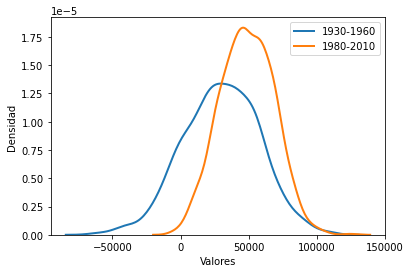

In [80]:

params = [(attendance_mean1, np.sqrt(attendance_var1)),(attendance_mean2, np.sqrt(attendance_var2))]


for mu, sigma in params:
    sn.distplot(np.random.normal(mu, sigma, 1000), hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.legend(prop={'size': 8}, title = 'Parámetros')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(['1930-1960', '1980-2010'])
plt.show()

## **2.2 Series Temporales**


## **2.3 Simulación**
